# Functions for Creating Sparse Matrices

In [1]:
import scipy.sparse as sp
import scipy.sparse.linalg

import numpy as np
import matplotlib.pyplot as plt

The `sp.sparse` module provides a variety of functions for
generating such matrices, for example, `sp.eye` for creating diagonal sparse matrices with
ones on the diagonal (optionally offset from the main diagonal), `sp.diags` for creating
diagonal matrices with a specified pattern along the diagonal, `sp.kron` for calculating
the Kronecker (tensor) product of two sparse matrices, and `bmat`, `vstack`, and `hstack`,
for building sparse matrices from sparse block matrices, and by stacking sparse matrices
vertically and horizontally, respectively.

For example, in many applications sparse matrices have a diagonal form. To create a
sparse matrix of size 10 × 10 with a main diagonal and an upper and lower diagonal, we
can use three calls to `sp.eye`, using the `k` argument to specify the offset from the main
diagonal

In [8]:
N = 10

# Matrix K for diff
K = sp.eye(N, k=1) - 2 * sp.eye(N) + sp.eye(N, k=-1)
K

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Row format>

In [9]:
# Preview of K
K.toarray()

array([[-2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.]])

By default the resulting object is sparse matrix in the `CSR` format, but using the
format argument, we can specify any other sparse matrix format. The value of the format
argument should be a string such as 'csr', 'csc', 'lil', etc. All functions for creating
sparse matrices in `sp.sparse` accept this argument. For example, in the previous
example, we could have produced the same matrix using `sp.diags`, by specifying the
pattern $[1, –2, 1]$ (the coefficients to the `sp.eye` functions in the previous expression),
and the corresponding offsets from the main diagonal $[1, 0, –1]$. If we additionally
want the resulting sparse matrix in `CSC` format, we can set `format='csc'`:

In [10]:
K = sp.diags([1, -2, 1], [1, 0, -1], shape=[N, N], format='csc')

K

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Column format>

The advantages of using sparse matrix formats rather than dense matrices only
manifest themselves when working with large matrices. Sparse matrices are by their
nature therefore large, and hence it can be difficult to visualize a matrix by, for example,
printing its elements in the terminal. `Matplotlib` provides the function `spy`, which is a
useful tool for visualizing the structure of a sparse matrix. It is available as a function
in pyplot module or as a method for `Axes` instances. When using it on the previously
defined $K$ matrix, we obtain the results shown in Figure

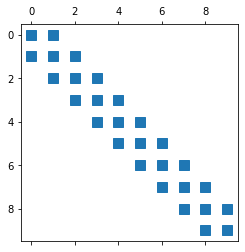

In [11]:
fig, ax = plt.subplots()
ax.spy(K)

> Structure of the sparse matrix with nonzero elements only on the two
diagonals closest to the main diagonal and the main diagonal itself

Sparse matrices are also often associated with tensor product spaces. For such
cases we can use the `sp.kron` function to compose a sparse matrix from its smaller
components. For example, to create a sparse matrix for the tensor product between $K$
and the matrix

$$
X = \begin{bmatrix}
    0 & 1 & 0 \\
    1 & 0 & 1 \\
    0 & 1 & 0
\end{bmatrix}
$$

we can use `sp.kron(K, X)`

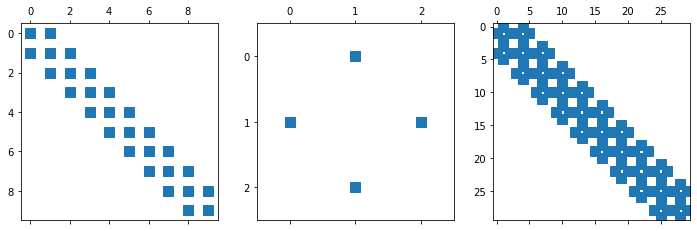

In [18]:
X = sp.diags([1, 1], [-1, 1], shape=[3,3])

Y = sp.kron(K, X)

# Good pattern to use destructoring per every axis
fig, (ax_K, ax_X, ax_Y) = plt.subplots(1, 3, figsize=(12, 4))

# Visualize patterns
ax_K.spy(K)
ax_X.spy(X)
ax_Y.spy(Y)

> The sparse matrix structures of two matrices K (left) and X (middle)
and their tensor product (right)

# Sparse Linear Algebra Functions

The main application of sparse matrices is to perform linear algebra operations on large
matrices that are intractable or inefficient to treat using dense matrix representations.
The SciPy sparse module contains a module `linalg` that implements many linear
algebra routines. Not all linear algebra operations are suitable for sparse matrices, and in
some cases the behavior of the sparse matrix version of operations needs to be modified
compared to the dense counterparts. Consequently, there are a number of differences
between the sparse linear algebra module `scipy.sparse.linalg` and the dense linear
algebra module `scipy.linalg`. For example, the eigenvalue solvers for dense problems
typically compute and return all eigenvalues and eigenvectors. For sparse matrices this
is not manageable, because storing all eigenvectors of a sparse matrix $A$ of size N × N
usually amounts to storing a dense matrix of size N × N. Instead, sparse eigenvalue
solvers typically give a few eigenvalues and eigenvectors, for example, those with the
smallest or largest eigenvalues. In general, for sparse matrix methods to be efficient,
they must retain the sparsity of matrices involved in the computation. An example of an
operation where the sparsity usually is not retained is the matrix inverse, and it should
therefore be avoided when possible